In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


##Import any other packages you may need here
from itertools import chain
from skimage.io import imread, imshow

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
401,00002094_000.png,Atelectasis|Effusion|Fibrosis,0,2094,050Y,M,PA,2500,2048,0.171,0.171
1349,00007026_000.png,No Finding,0,7026,055Y,M,PA,2500,2048,0.171,0.171
5240,00028109_000.png,No Finding,0,28109,045Y,F,PA,2992,2991,0.143,0.143


In [3]:
## EDA
# Todo
all_xray_df.columns  #check the coulmns name of the dataframe

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

Text(0, 0.5, 'Number of Patient')

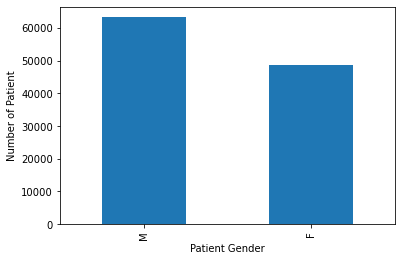

In [4]:
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')
plt.xlabel('Patient Gender')
plt.ylabel('Number of Patient')

In [5]:
all_xray_df['Patient Age'][all_xray_df['Patient Age']>100]  #check patient age > 100

20852     412
46965     414
48284     148
55742     148
58650     150
62929     149
74884     152
78795     151
84810     411
85404     412
86264     413
91369     412
95794     153
98495     154
101194    155
104590    155
Name: Patient Age, dtype: int64

Text(0, 0.5, 'Number of Patient')

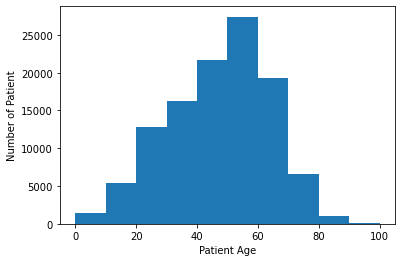

In [6]:
plt.hist(all_xray_df['Patient Age'], range=(0,100))
plt.xlabel('Patient Age')
plt.ylabel('Number of Patient')

Text(0, 0.5, 'Number of Patient')

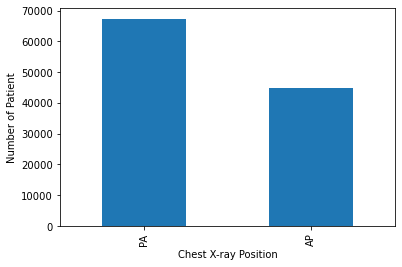

In [7]:
all_xray_df['View Position'].value_counts().plot(kind='bar')
plt.xlabel('Chest X-ray Position')
plt.ylabel('Number of Patient')

In [8]:
#split the labels
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
48367,00012266_000.png,Consolidation,0,12266,53,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67674,00016723_003.png,No Finding,3,16723,28,M,PA,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
90101,00022408_003.png,No Finding,3,22408,51,F,PA,2554,2481,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Number of Images with Label')

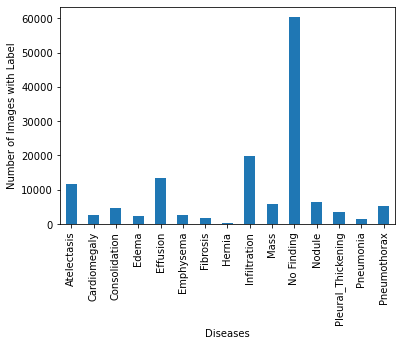

In [9]:
all_xray_df[all_labels].sum().plot(kind='bar')
plt.xlabel('Diseases')
plt.ylabel('Number of Images with Label')

In [10]:
all_xray_df[all_labels].sum()

Atelectasis           11559.0
Cardiomegaly           2776.0
Consolidation          4667.0
Edema                  2303.0
Effusion              13317.0
Emphysema              2516.0
Fibrosis               1686.0
Hernia                  227.0
Infiltration          19894.0
Mass                   5782.0
No Finding            60361.0
Nodule                 6331.0
Pleural_Thickening     3385.0
Pneumonia              1431.0
Pneumothorax           5302.0
dtype: float64

In [11]:
num = all_xray_df[all_labels].sum()
p_num = num['Pneumonia']
not_p_num = num.sum()-p_num-num['No Finding']
print('Number of Pneumonia cases:', int(p_num))
print('Number of non-Pneumonia cases:', int(not_p_num))
print('Number of diseases per patient:', (p_num+not_p_num) / len(all_xray_df))

Number of Pneumonia cases: 1431
Number of non-Pneumonia cases: 79745
Number of diseases per patient: 0.7240099892971816


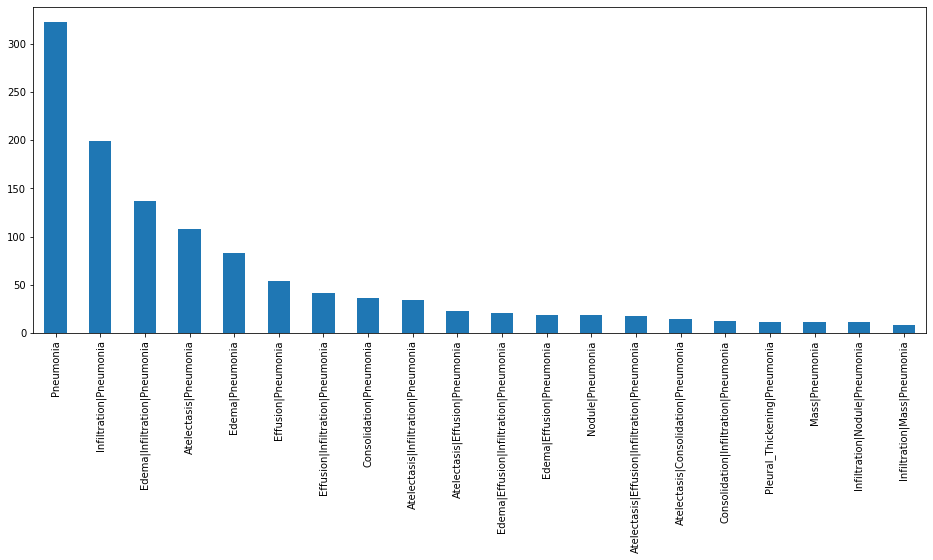

In [12]:
##Check the comorbidities of Pneumonia, only 20 most common co-occurrences are shown
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:20].plot(kind='bar')

In [13]:
#Check whether Pneumonia is usually occuring alone 
total_num=all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()
alone_num = total_num[0]
co_num = total_num[1:].sum()
print('Number of pateints having Pneumonia only:',alone_num)
print('Number of pateints having Pneumonia and other diseases:', co_num)

Number of pateints having Pneumonia only: 322
Number of pateints having Pneumonia and other diseases: 1109


(array([ 39.,  87., 190., 241., 251., 290., 252.,  67.,  12.,   1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

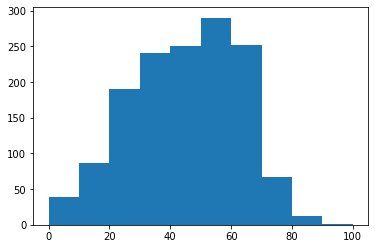

In [14]:
#Compare the population of Pneumonia to normal population
plt.hist(all_xray_df[all_xray_df.Pneumonia==1]['Patient Age'],range=(0,100))

In [15]:
min_age = np.min(all_xray_df[all_xray_df.Pneumonia==1]['Patient Age'])
max_age = np.max(all_xray_df[all_xray_df.Pneumonia==1][all_xray_df['Patient Age']<100]['Patient Age'])
print("The patients' age are from {} to {}.".format(min_age,max_age))

The patients' age are from 2 to 90.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


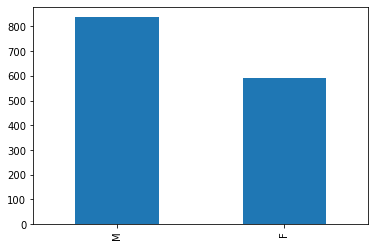

In [16]:
all_xray_df[all_xray_df.Pneumonia==1]['Patient Gender'].value_counts().plot(kind='bar')

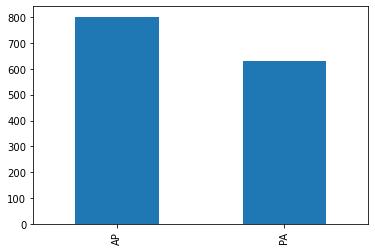

In [17]:
all_xray_df[all_xray_df.Pneumonia==1]['View Position'].value_counts().plot(kind='bar')

### Findings on the population
After exploring the data, the number of male patient is a little bit more than female patient. The ratio of male to female is about 6:5.<br>
Pateints have a wide range of age, from 1 to 100. Most of them are between 20 to 70 years old. But there are few unrealistic data aged from 148 to 414.<br>
Chest X-ray were taken in two positions, PA and AP. Number of PA to number of AP is about 6:4.


Only 23% of Pneumonia occur alone. Usually, it occurs with other diseases. The most common comorbidities are Infiltration, Atelectasis and Edema.<br>
The distribution of patient having Pneumonia is simialar to the general population.

It is believed that no special adjustments is required for the patients' distribution.

In [18]:
#take out the samples of healthy and some diseases
disease_list = ['No Finding','Pneumonia','Infiltration','Atelectasis','Edema']
disease_dict={}
for i in disease_list:
    disease_dict[i]=sample_df[sample_df['Finding Labels']==i]
    
#find the paths of smaple images
img_paths=[]
for i in disease_list:
    img_paths.append([glob(f'/data/images*/*/{i}')[0] for i in disease_dict[i]['Image Index'].sample(2,random_state=2021).values])


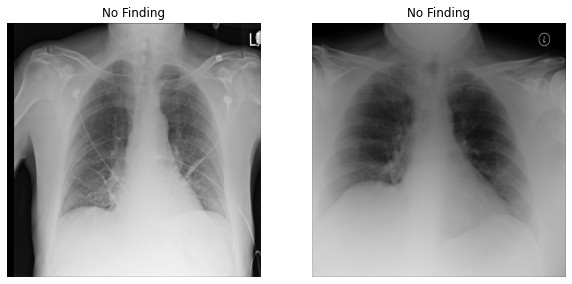

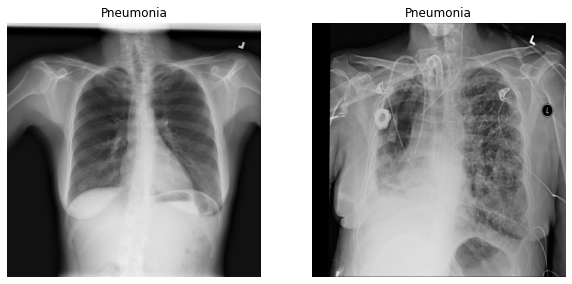

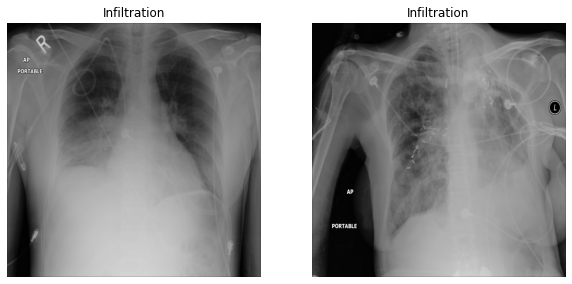

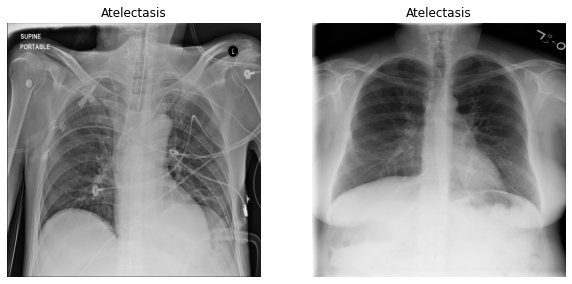

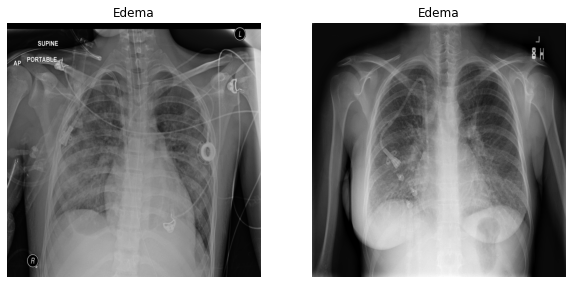

In [19]:
#Visualize the images
for count,path in enumerate(img_paths):
    _,axs = plt.subplots(1,2, figsize=(10,10))
    axs = axs.flatten()
    for img_path, ax in zip(path,axs):
        img = plt.imread(img_path)
        ax.set_title(disease_list[count])
        ax.axis('off')
        ax.imshow(img,cmap='gray')
    plt.show

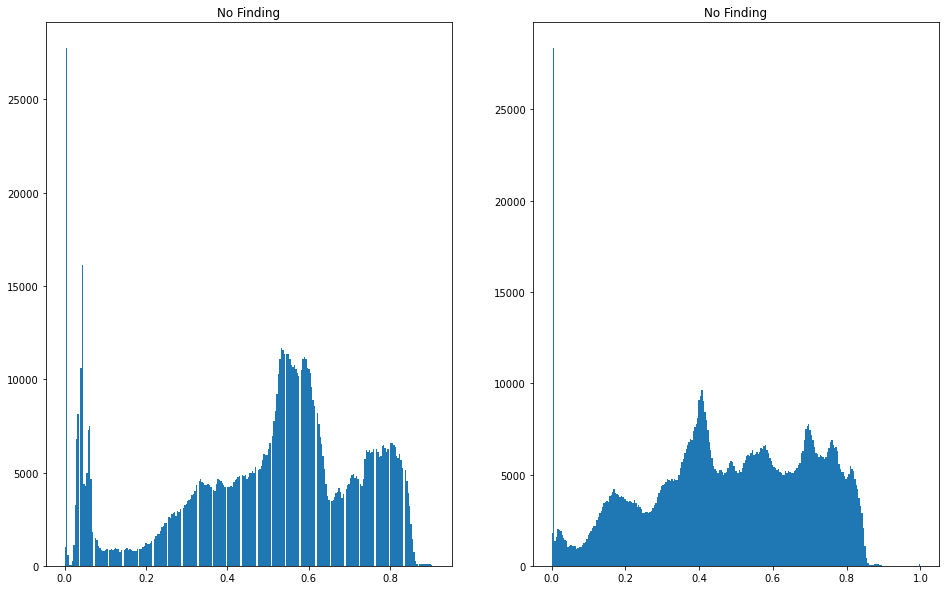

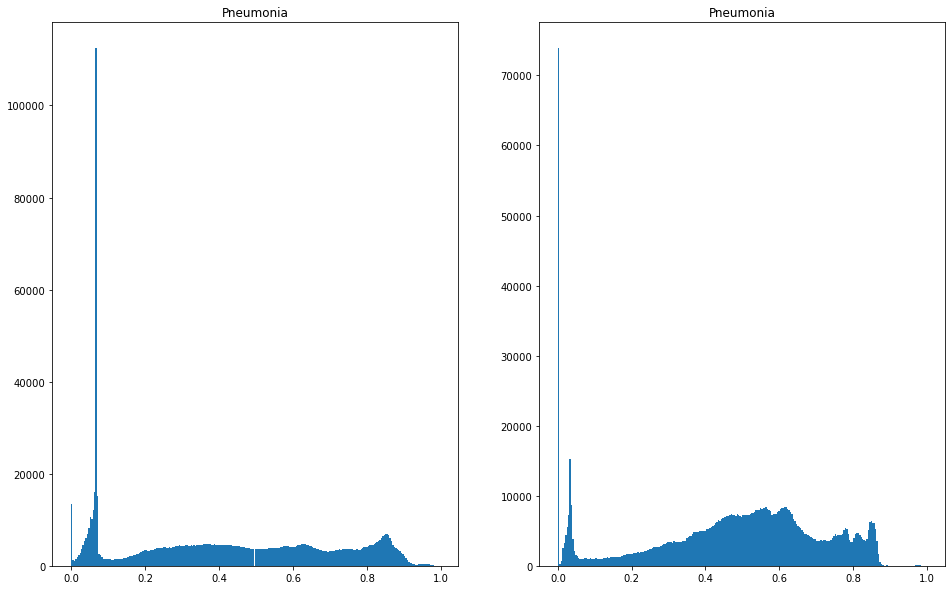

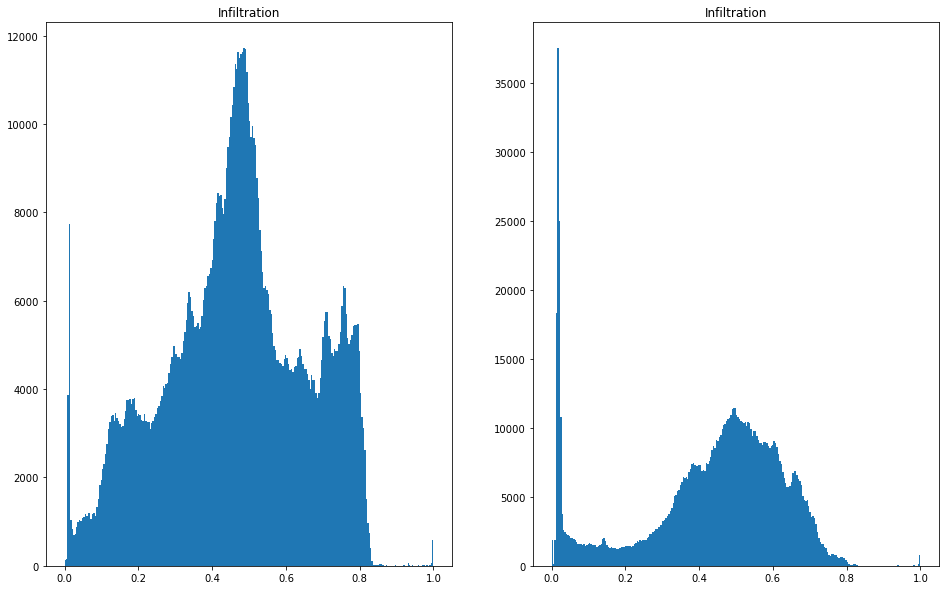

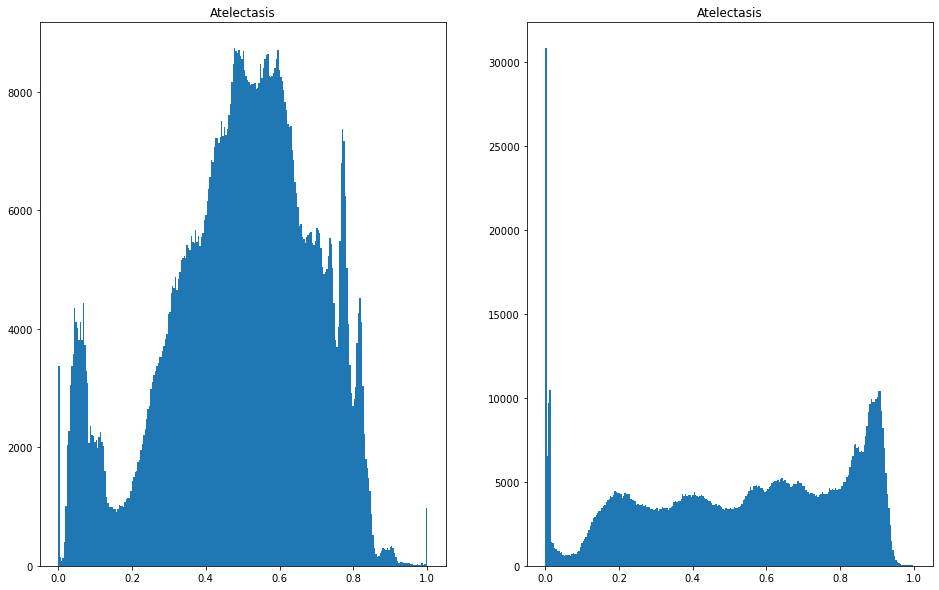

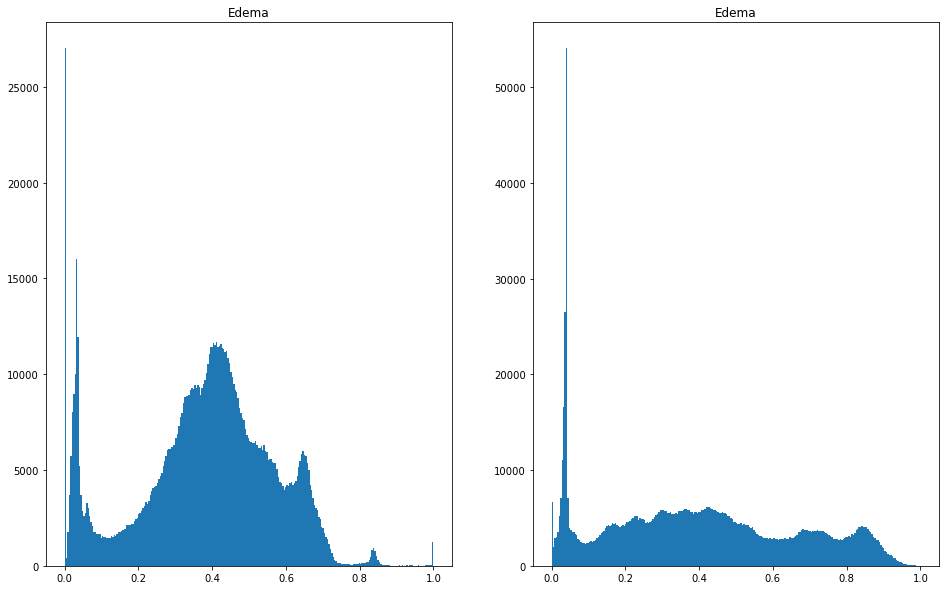

In [20]:
#Distributions of intensity values of the pixel
for count,path in enumerate(img_paths):
    _,axs = plt.subplots(1,2, figsize=(16,10))
    axs = axs.flatten()
    for img_path, ax in zip(path,axs):
        img = plt.imread(img_path)
        ax.set_title(disease_list[count])
        ax.hist(img.ravel(), bins = 256)
    plt.show

In [21]:
#Mean density of pixel of different diseases
for count,path in enumerate(img_paths):
    for img_path in path:
        img = plt.imread(img_path)
        title=disease_list[count]
        mean_intensity = np.mean(img)
        print('Mean density of pixel of {} : {:.4}'.format(title,mean_intensity))


Mean density of pixel of No Finding : 0.4957
Mean density of pixel of No Finding : 0.4783
Mean density of pixel of Pneumonia : 0.42
Mean density of pixel of Pneumonia : 0.4701
Mean density of pixel of Infiltration : 0.4638
Mean density of pixel of Infiltration : 0.4299
Mean density of pixel of Atelectasis : 0.4928
Mean density of pixel of Atelectasis : 0.538
Mean density of pixel of Edema : 0.3791
Mean density of pixel of Edema : 0.3987


### Conclusions on the images
Pneumonia's images show some white regions but sometimes it is not so obvious. It looks like the normal lungs are more clear than the ones with Pneumonia. The distributions of intensity values of the pixel do not show significant different among healthy images and images with diseases. It may depend more on the setting and model of devices.In view of mean density, Pneumonia's images are close to healthy images. Some diseaes may have significant different like Edema.

The deep learning model is trained to distinguish a clear lung's image and a infected lung's image. The model needs to recognize the anomalous white places in the images. 